In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
"""Step 3: Apply PCA
In iris dataset, the original feature space has 4 dimensions, known as p dimensions. PCA will project the data onto a smaller subspace of k dimensions (where k < p) while retaining as much of the variation as possible. These k dimensions are known as the principal components.
By applying PCA, we lose some of the variance (i.e., information). 
By reducing the dimensionality of the data, PCA will reduce the size of the data.

This will improve the performance of machine learning algorithms.
This will reduce hardware requirements and speed up the training process.
This will allow us to easily understand the underlying structure of the data.
This will allow us to visualize the data on a 2d or 3d plot (if we choose the number of principal components as 2 or 3)."""

'Step 3: Apply PCA\nIn iris dataset, the original feature space has 4 dimensions, known as p dimensions. PCA will project the data onto a smaller subspace of k dimensions (where k < p) while retaining as much of the variation as possible. These k dimensions are known as the principal components.\nBy applying PCA, we lose some of the variance (i.e., information). \nBy reducing the dimensionality of the data, PCA will reduce the size of the data.\n\nThis will improve the performance of machine learning algorithms.\nThis will reduce hardware requirements and speed up the training process.\nThis will allow us to easily understand the underlying structure of the data.\nThis will allow us to visualize the data on a 2d or 3d plot (if we choose the number of principal components as 2 or 3).'

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape,y.shape


#""The feature matrix contains the values of all 4 features in the dataset.It  is a 150x4 two-dimensional Numpy array. It is stored in the X variable."""

((150, 4), (150,))

In [6]:

"""Standardize the features if necessary
You can see that the values of the dataset are not equally scaled. 
So, we need to apply z-score standardization to get all features into the same scale. 
For this, we use Scikit-learn StandardScaler() class which is in the preprocessing submodule in Scikit-learn."""


from sklearn.preprocessing import StandardScaler

#create the object 
sc = StandardScaler()

#calculate the mean and standard deviation
sc.fit(X)

#transform the values 
X_scaled = sc.transform(X)

In [7]:
"""First, we import the StandardScaler() class. Then, we create an object of that class and store it in the variable scaler. 
Then we use the scaler object’s fit() method with the input X (feature matrix). 
This will calculate the mean and standard deviation for each variable in the dataset.
Finally, we do the transformation with the transform() method of the scaler object.
The transformed (scaled) values of X are stored in the variable X_scaled which is also a 150x4 two-dimensional Numpy array."""

'First, we import the StandardScaler() class. Then, we create an object of that class and store it in the variable scaler. \nThen we use the scaler object’s fit() method with the input X (feature matrix). \nThis will calculate the mean and standard deviation for each variable in the dataset.\nFinally, we do the transformation with the transform() method of the scaler object.\nThe transformed (scaled) values of X are stored in the variable X_scaled which is also a 150x4 two-dimensional Numpy array.'

In [8]:
"""3.c: Choose the right number of dimensions (k)
Now, we are ready to apply PCA for our dataset. Before that, we need to choose the right number of dimensions (i.e., the right number of principal components — k). 
For this, we apply PCA with the original number of dimensions (i.e., 4) and see how well PCA captures the variance of the data."""

from sklearn.decomposition import PCA
pca_30 = PCA(n_components = 4, random_state=0)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)


In [9]:
"""In Scikit-learn, PCA is applied using the PCA() class. It is in the decomposition submodule in Scikit-learn. The most important hyperparameter in that class is n_components. It can take one of the following types of values.

None: This is the default value. If we do not specify the value, all components are kept.

In our example, this exactly the same as n_components=4.
int: If this is a positive integer like 1, 2, 30, 100, etc, the algorithm will return that number of principal components.
The integer value should be less than or equal to the original number of features in the dataset.


float: If 0 < n_components < 1, PCA will select the number of components such that the amount of variance that needs to be explained. 
For example, if n_components=0.95, the algorithm will select the number of components while preserving 95% of the variability in the data.



When applying PCA, all you need to do is to create an instance of the PCA() class and fit it using the scaled values of X. Then apply the transformation. 
The variable X_pca_30 stores the transformed values of the principal components returned by the PCA() class. X_pca_30 is a 150x4 two-dimensional Numpy array.



"""

'In Scikit-learn, PCA is applied using the PCA() class. It is in the decomposition submodule in Scikit-learn. The most important hyperparameter in that class is n_components. It can take one of the following types of values.\n\nNone: This is the default value. If we do not specify the value, all components are kept.\n\nIn our example, this exactly the same as n_components=4.\nint: If this is a positive integer like 1, 2, 30, 100, etc, the algorithm will return that number of principal components.\nThe integer value should be less than or equal to the original number of features in the dataset.\n\n\nfloat: If 0 < n_components < 1, PCA will select the number of components such that the amount of variance that needs to be explained. \nFor example, if n_components=0.95, the algorithm will select the number of components while preserving 95% of the variability in the data.\n\n\n\nWhen applying PCA, all you need to do is to create an instance of the PCA() class and fit it using the scaled va

In [10]:
print("Variance explained by all the 4 principal component = ", sum(pca_30.explained_variance_ratio_*100))


#We have set n_components=4. The original number of dimensions in our dataset is also 4. We have not reduced the dimensionality at all (we’ve just transformed the data). 
#Therefore, the percentage of variance explained by 4 principal components should be 100%.



Variance explained by all the 4 principal component =  99.99999999999999


In [11]:
"""The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array
which contains the values of the percentage of variance explained by each of the selected components."""

pca_30.explained_variance_ratio_*100

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [12]:

np.cumsum(pca_30.explained_variance_ratio_*100)

"""The first component alone captures about 72.96% of the variability in the dataset and the second component alone captures about 22.85% of the variability in the dataset and so on.
Also, note that the values of the above array are sorted in descending order. 
Taking the sum of the above array will return the total variance explained by each of the selected components.
If we get the cumulative sum of the above array, we can see the following array."""

'The first component alone captures about 72.96% of the variability in the dataset and the second component alone captures about 22.85% of the variability in the dataset and so on.\nAlso, note that the values of the above array are sorted in descending order. \nTaking the sum of the above array will return the total variance explained by each of the selected components.\nIf we get the cumulative sum of the above array, we can see the following array.'

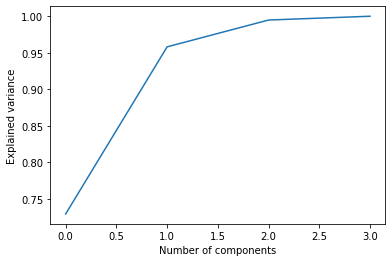

In [13]:
#create following plot

plt.plot(np.cumsum(pca_30.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi= 100)

In [14]:
"""You can see that the first 2 principal components keep about 95.8% of the variability in the dataset while reducing 2 (4-2) features in the dataset. That’s great. The remaining 2 features only contain less than 5% of the variability in data."""

print("variance explained by first PC=", np.cumsum(pca_30.explained_variance_ratio_*100)[0])
print("variance explained by second PC=", np.cumsum(pca_30.explained_variance_ratio_*100)[1])
print("variance explained by third PC=", np.cumsum(pca_30.explained_variance_ratio_*100)[2])

variance explained by first PC= 72.96244541329986
variance explained by second PC= 95.81320720000164
variance explained by third PC= 99.48212908928451


In [15]:
"""You can see that the first 2 principal components keep about 95.8% of the variability in the dataset while reducing 2 (4-2) features in the dataset. That’s great.
The remaining 2 features only contain less than 5% of the variability in data"""

'You can see that the first 2 principal components keep about 95.8% of the variability in the dataset while reducing 2 (4-2) features in the dataset. That’s great.\nThe remaining 2 features only contain less than 5% of the variability in data'

In [16]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
y = y.str.replace('setosa', '0')
y = y.str.replace('versicolor', '1')
y = y.str.replace('virginica', '2')

In [18]:
y.unique()

array(['0', '1', '2'], dtype=object)

In [19]:
"""Let’s apply PCA to our dataset with n_components=0.95.
This will select the number of components while preserving 95% of the variability in the data."""

from sklearn.decomposition import PCA
pca_95 = PCA(n_components = 0.95, random_state=0)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

from sklearn.model_selection import train_test_split, cross_val_score
#Create training and testing variables by splitting data into 80:20 train:test ratio
X_train, X_test, y_train, y_test = train_test_split(X_pca_95, y, test_size=0.2, random_state=0)

In [20]:
''' create a pandas DataFrame using the values of all 4 principal components and add the label column of the original dataset.
    After executing the above code, the files will be saved in your current working directory. 
    By using the new dataset, you can apply classification algorithms like Logistic Regression, Support Vector Machines and K-Nearest Neighbours to further analyze the data.
'''

' create a pandas DataFrame using the values of all 4 principal components and add the label column of the original dataset.\n    After executing the above code, the files will be saved in your current working directory. \n    By using the new dataset, you can apply classification algorithms like Logistic Regression, Support Vector Machines and K-Nearest Neighbours to further analyze the data.\n'

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score

In [22]:
log_reg = LogisticRegression(class_weight='balanced') # balanced the class, as the dataset is imbalanced 
log_reg.fit(X_train,y_train)
pred_logr_base = log_reg.predict(X_test)
print(classification_report(y_test,pred_logr_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.92      0.92        13
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [23]:
log_reg_2 = LogisticRegression()
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"], "class_weight":["balanced"]}# l2 ridge
log_reg_cv=GridSearchCV(log_reg_2,grid,scoring="accuracy",cv=5,n_jobs=-1, refit=True)
log_reg_cv.fit(X_train,y_train)

print("tuned best parameters: ",log_reg_cv.best_params_)
print("accuracy :",log_reg_cv.best_score_)

tuned best parameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
accuracy : 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [24]:
# use the best parameters
best_model_logr = LogisticRegression(C=log_reg_cv.best_params_['C'], penalty=log_reg_cv.best_params_['penalty'],class_weight='balanced')
best_model_logr.fit(X_train, y_train)
pred_logr = best_model_logr.predict(X_test)
print(classification_report(y_test,pred_logr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.92      0.92        13
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [25]:
dt = DecisionTreeClassifier(criterion='entropy') 
dt.fit(X_train,y_train)
pred_dt_base = dt.predict(X_test)
print(classification_report(y_test,pred_dt_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.92      0.92        13
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [26]:
dt_2 = DecisionTreeClassifier()
dt_grid={"criterion":["entropy"], "max_depth":[5,10]}
dt_cv=GridSearchCV(dt_2,dt_grid,scoring="accuracy",cv=5,n_jobs=-1, refit=True)
dt_cv.fit(X_train,y_train)

print("tuned best parameters: ",dt_cv.best_params_)
print("accuracy :",dt_cv.best_score_)

tuned best parameters:  {'criterion': 'entropy', 'max_depth': 10}
accuracy : 0.875


In [27]:
# use the best parameters
best_model_dt = DecisionTreeClassifier(max_depth=dt_cv.best_params_['max_depth'],criterion='entropy')
best_model_dt.fit(X_train, y_train)
pred_dt = best_model_dt.predict(X_test)
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [28]:
rfc = RandomForestClassifier(criterion='entropy') 
rfc.fit(X_train,y_train)
pred_rfc_base = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.85      0.88        13
           2       0.71      0.83      0.77         6

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.91      0.90      0.90        30



In [29]:
rfc_2 = RandomForestClassifier()
rfc_grid={"n_estimators":[10, 50, 100], "criterion":["entropy"], "max_depth":[5,10]}# l2 ridge
rfc_cv=GridSearchCV(rfc_2,rfc_grid,scoring="accuracy",cv=5,n_jobs=-1, refit=True)
rfc_cv.fit(X_train,y_train)

print("tuned best parameters: ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}
accuracy : 0.8916666666666666


In [30]:
# use the best parameters
best_model_rfc = RandomForestClassifier(n_estimators=rfc_cv.best_params_['n_estimators'],max_depth=rfc_cv.best_params_['max_depth'],criterion='entropy')
best_model_rfc.fit(X_train, y_train)
pred_rfc = best_model_rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.85      0.85        13
           2       0.67      0.67      0.67         6

    accuracy                           0.87        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.87      0.87      0.87        30



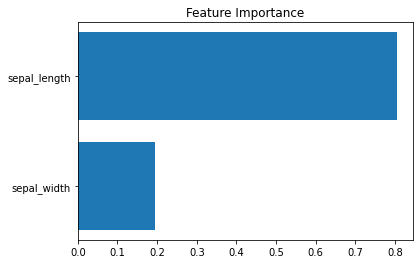

In [31]:
# checking which are the most important features
feature_importance = rfc.fit(X_train, y_train).feature_importances_

# Make importances relative to max importance.
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.title('Feature Importance')
plt.show()

We can see that sepal_length is the most important feature for random forest in iris data, about 80%

In [32]:
all_results = {}
all_results['logistic'] = accuracy_score(y_test, pred_logr_base)
all_results['logistic_CV'] = accuracy_score(y_test, pred_logr)
all_results['Decision_tree'] = accuracy_score(y_test, pred_dt_base)
all_results['Decision_tree_CV'] = accuracy_score(y_test, pred_dt)
all_results['Random_forest'] = accuracy_score(y_test, pred_rfc_base)
all_results['Random_forest_CV'] = accuracy_score(y_test, pred_rfc)

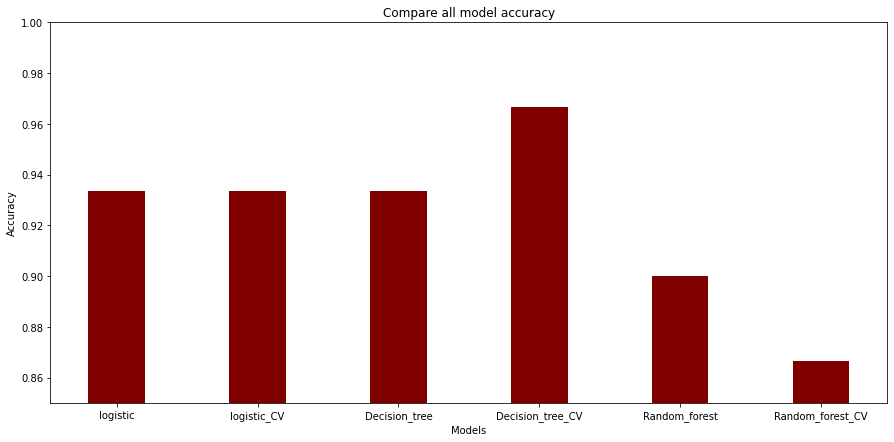

In [33]:
models = list(all_results.keys())
accuracy = list(all_results.values())

fig = plt.figure(figsize = (15, 7))

# creating the bar plot
plt.bar(models, accuracy, color ='maroon',
		width = 0.4)

plt.ylim(0.85, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Compare all model accuracy")
plt.show()

Decision tree with grid search has 97%, it is the best model for iris data.

So we decide to use decision tree to predict new data.

y = y.str.replace('setosa', '0')

y = y.str.replace('versicolor', '1')

y = y.str.replace('virginica', '2')

In [34]:
def predict_result(result):
  print(result)
  if result == 0:
    return "It is setosa"
  elif result == 1:
    return "It is versicolor"
  else:
    return "It is virginica"

In [35]:
import random
rand_int = random.randint(0,150)
my_data = X_pca_95[rand_int]
my_pred = best_model_dt.predict([my_data])
predict_result(my_pred)

['0']


'It is virginica'

In [36]:
print(f"I came of my_data = {X_pca_95[rand_int]}, the prediction is {predict_result(my_pred)}")

['0']
I came of my_data = [-2.44402884  0.0476442 ], the prediction is It is virginica
